In [32]:
import os
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as st
import seaborn as sns

In [6]:
annualfed_path = os.path.join("resources", "Fedfunds.csv")

with open(annualfed_path , newline="") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=",")

In [7]:
#Load and read fedfunds csv
data = pd.read_csv("resources/Fedfunds.csv")
data_fed = data
data_fed['DATE'] = pd.to_datetime(data_fed['DATE'])
data_fed = data_fed.groupby([data_fed['DATE'].dt.strftime('%Y-%m')])['FED RATES'].last().reset_index()


In [8]:
data_fed.head()

,DATE,FED RATES
0,2017-01,0.65
1,2017-02,0.66
2,2017-03,0.79
3,2017-04,0.90
4,2017-05,0.91


In [9]:
mtg30_path = os.path.join("resources", "Mtg30.csv")

with open(annualfed_path , newline="") as csvfile:

    csv_reader = csv.reader(csvfile, delimiter=",")
    data = pd.read_csv("resources/Mtg30.csv")
data_mtg30 = data
data_mtg30['DATE'] = pd.to_datetime(data_fed['DATE'])
data_mtg30 = data_mtg30.groupby([data_mtg30 ['DATE'].dt.strftime('%Y-%m')])['Mtg30'].last().reset_index()
data_mtg30.head()

,DATE,Mtg30
0,2017-01,4.20
1,2017-02,4.12
2,2017-03,4.09
3,2017-04,4.19
4,2017-05,4.19


In [10]:
#merge the fed rates and 30 year mtg rate
rates_df = pd.merge(data_fed, data_mtg30, on=["DATE"])


rates_df["FED RATES"] = rates_df["FED RATES"].astype(float)
rates_df["Mtg30"] = rates_df["Mtg30"].astype(float)
rates_df['DATE'] = pd.to_datetime(rates_df['DATE'])



rates_df. head()



,DATE,FED RATES,Mtg30
0,2017-01-01,0.65,4.20
1,2017-02-01,0.66,4.12
2,2017-03-01,0.79,4.09
3,2017-04-01,0.90,4.19
4,2017-05-01,0.91,4.19


In [11]:
#Convert the Mtg15 file
mtg15_path = os.path.join("resources", "Mtg15.csv")

with open(mtg15_path , newline="") as csvfile:

    csv_reader = csv.reader(csvfile, delimiter=",")
    data = pd.read_csv("resources/Mtg15.csv")
data_mtg15 = data
data_mtg15['DATE'] = pd.to_datetime(data_mtg15['DATE'])

data_mtg15 = data_mtg15.groupby([data_mtg15 ['DATE'].dt.strftime('%Y-%m')])['Mtg15'].last().reset_index()


data_mtg15.head()




,DATE,Mtg15
0,2017-01,3.40
1,2017-02,3.37
2,2017-03,3.39
3,2017-04,3.27
4,2017-05,3.19


In [12]:
#merge the the file
rates1_df = pd.merge(pd.merge(data_fed, data_mtg30, on='DATE'),data_mtg15, on= 'DATE')


rates1_df.head()

,DATE,FED RATES,Mtg30,Mtg15
0,2017-01,0.65,4.20,3.40
1,2017-02,0.66,4.12,3.37
2,2017-03,0.79,4.09,3.39
3,2017-04,0.90,4.19,3.27
4,2017-05,0.91,4.19,3.19


In [13]:
#Convert the MtgFHA file
mtgfha_path = os.path.join("resources", "MtgFHA.csv")

with open(mtgfha_path , newline="") as csvfile:

    csv_reader = csv.reader(csvfile, delimiter=",")
    data = pd.read_csv("resources/MtgFHA.csv")
data_mtgfha = data
data_mtgfha['DATE'] = pd.to_datetime(data_mtgfha['DATE'])
data_mtgfha = data_mtgfha.groupby([data_mtgfha ['DATE'].dt.strftime('%Y-%m')])['FHA 30'].last().reset_index()
data_mtgfha.head()

,DATE,FHA 30
0,2017-01,4.275
1,2017-02,4.215
2,2017-03,4.313
3,2017-04,4.231
4,2017-05,4.159


In [14]:
#merge the the file
rates2_df = pd.merge(pd.merge(pd.merge(data_fed, data_mtg30, on='DATE'),data_mtg15, on= 'DATE'),data_mtgfha, on= 'DATE')


rates2_df.head()

,DATE,FED RATES,Mtg30,Mtg15,FHA 30
0,2017-01,0.65,4.20,3.40,4.275
1,2017-02,0.66,4.12,3.37,4.215
2,2017-03,0.79,4.09,3.39,4.313
3,2017-04,0.90,4.19,3.27,4.231
4,2017-05,0.91,4.19,3.19,4.159


In [15]:
#Convert the MtgJumbo file
mtgjumbo_path = os.path.join("resources", "MtgJumbo.csv")

with open(mtgjumbo_path , newline="") as csvfile:

    csv_reader = csv.reader(csvfile, delimiter=",")
    data = pd.read_csv("resources/MtgJumbo.csv")
data_mtgjumbo = data
data_mtgjumbo['DATE'] = pd.to_datetime(data_mtgjumbo['DATE'])
data_mtgjumbo = data_mtgjumbo.groupby([data_mtgjumbo ['DATE'].dt.strftime('%Y-%m')])['Jumbo30'].last().reset_index()
data_mtgjumbo.head()

,DATE,Jumbo30
0,2017-12,4.18
1,2018-01,4.428
2,2018-02,4.593
3,2018-03,4.447
4,2018-04,4.648


In [16]:
#merge the the file
rates3_df = pd.merge(pd.merge(pd.merge(pd.merge(data_fed, data_mtg30, on='DATE'),data_mtg15, on= 'DATE'),data_mtgfha, on= 'DATE'),data_mtgjumbo, on= 'DATE')

rates3_df = rates3_df.loc[rates3_df['DATE'] >= '1/1/2018']

rates3_df.head()

,DATE,FED RATES,Mtg30,Mtg15,FHA 30,Jumbo30
0,2017-12,1.30,4.23,3.44,4.288,4.18
1,2018-01,1.41,4.14,3.62,4.556,4.428
2,2018-02,1.42,4.10,3.85,4.837,4.593
3,2018-03,1.51,4.08,3.90,4.788,4.447
4,2018-04,1.69,3.97,4.02,4.959,4.648


In [17]:
# rates4_df = rates3_df.dropna()
# rates4_df

In [18]:
#write data to csv
# rates3_df.to_csv("mtgrates.csv")

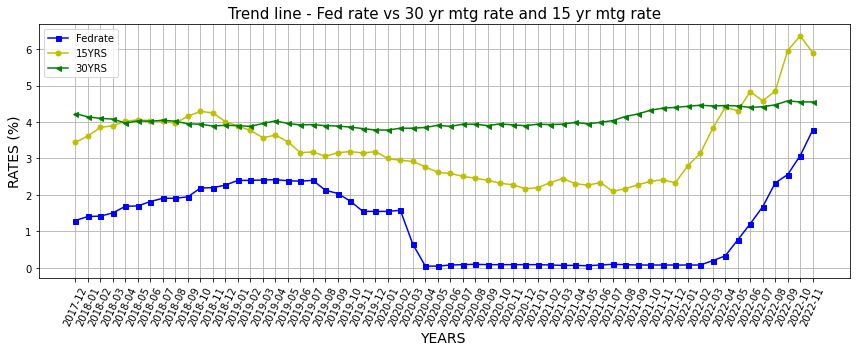

In [19]:


x1 = rates3_df['DATE']
y1 = rates3_df['FED RATES']
y2 = rates3_df['Mtg15']
y3= rates3_df['Mtg30']


fig1, ax1 = plt.subplots(figsize=(12,5))

plt.plot(x1, y1, markersize=5,marker="s",color="b", label= "Fedrate")
plt.plot(x1, y2, markersize=5,marker="o",color="y", label= "15YRS")
plt.plot(x1, y3, markersize=5,marker="<",color="g", label= "30YRS")

plt.title('Trend line - Fed rate vs 30 yr mtg rate and 15 yr mtg rate',fontsize =15)
plt.xlabel('YEARS',fontsize =14)
plt.ylabel('RATES (%)',fontsize =14)
plt.xticks(rotation = 65)
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig('resources/Fedmtg.jpg')
plt.show()



In [20]:
from scipy.stats import linregress

The r-value is: 0.7650491063754941


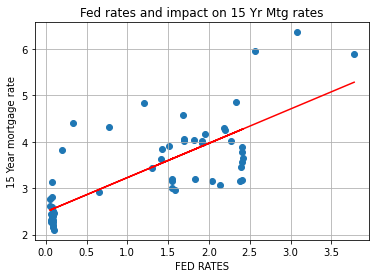

In [21]:

x = rates3_df['FED RATES']
y = rates3_df['Mtg15']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
#plt.annotate(line_eq, (50,60), fontsize=15,color="red")
plt.xlabel('FED RATES')
plt.ylabel('15 Year mortgage rate')
plt.title('Fed rates and impact on 15 Yr Mtg rates')
print(f"The r-value is: {rvalue}")
plt.grid()
plt.savefig('resources/15yrline.jpg')
plt.show()

The r-value is: 0.03243626322455816


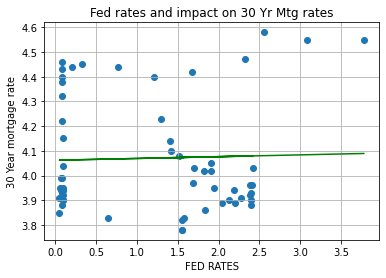

In [22]:
x = rates3_df['FED RATES']
y = rates3_df['Mtg30']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"g-")
plt.xlabel('FED RATES')
plt.ylabel('30 Year mortgage rate')
plt.title('Fed rates and impact on 30 Yr Mtg rates')
print(f"The r-value is: {rvalue}")
plt.grid()
plt.savefig('resources/30yr.jpg')
plt.show()




In [23]:
prices_csv = ("resources/redfin_texas_counties.csv")

# Read with Pandas
prices_df= pd.read_csv(prices_csv)
#narrow down dataframe to include only relevant columns
clean_df = prices_df[['period_begin', 'period_end', 'region', 'property_type', 'median_sale_price', 'median_sale_price_yoy', 'sold_above_list','median_dom']]

# ALL RESIDENTIAL Filter
clean_df = clean_df.loc[(clean_df['property_type'] == 'All Residential')]

#Creating a year column.  
clean_df['year'] = pd.DatetimeIndex(clean_df['period_end']).year

# Let's make sure 'date' is actually a date in pandas
clean_df["date"] = pd.to_datetime(clean_df["period_end"])
clean_df = clean_df.rename(columns={'date': 'DATE'})

#Filter on #2018-2022
years = [2018, 2019, 2020, 2021, 2022]
clean_df = clean_df.loc[clean_df['year'].isin(years)]

clean_df = clean_df.sort_values('period_end')


In [24]:
sale_price = clean_df.groupby(['DATE'])['median_sale_price_yoy'].mean()
sale_price_df = pd.DataFrame(sale_price)
sale_price_df.reset_index(inplace=True)

sale_price_df['DATE'] = pd.to_datetime(sale_price_df['DATE'])
sale_price_df =sale_price_df.groupby([sale_price_df['DATE'].dt.strftime('%Y-%m')])['median_sale_price_yoy'].last().reset_index()
sale_price_df.head()


,DATE,median_sale_price_yoy
0,2018-01,0.140621
1,2018-02,0.122411
2,2018-03,-0.003787
3,2018-04,0.041945
4,2018-05,0.037323


In [25]:
mtgprice_1 = pd.merge(sale_price_df, rates3_df, on = 'DATE')

mtgprice_1.head()


,DATE,median_sale_price_yoy,FED RATES,Mtg30,Mtg15,FHA 30,Jumbo30
0,2018-01,0.140621,1.41,4.14,3.62,4.556,4.428
1,2018-02,0.122411,1.42,4.10,3.85,4.837,4.593
2,2018-03,-0.003787,1.51,4.08,3.90,4.788,4.447
3,2018-04,0.041945,1.69,3.97,4.02,4.959,4.648
4,2018-05,0.037323,1.70,4.03,4.06,4.922,4.658


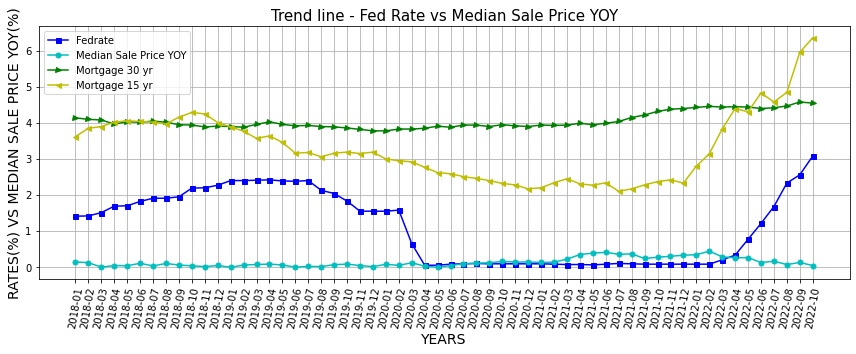

In [31]:
x1 = mtgprice_1['DATE']
y1 = mtgprice_1['FED RATES']
y2 = mtgprice_1['median_sale_price_yoy']
y3 = mtgprice_1["Mtg30"]
y4 = mtgprice_1["Mtg15"]



fig1, ax1 = plt.subplots(figsize=(12,5))

plt.plot(x1, y1, markersize=5,marker="s",color="b", label= "Fedrate")
plt.plot(x1, y2, markersize=5,marker="o",color="c", label= "Median Sale Price YOY")
plt.plot(x1, y3, markersize=5,marker=">",color="g", label= "Mortgage 30 yr")
plt.plot(x1, y4, markersize=5,marker="<",color="y", label= "Mortgage 15 yr")


plt.title('Trend line - Fed Rate vs Median Sale Price YOY',fontsize =15)
plt.xlabel('YEARS',fontsize =14)
plt.ylabel('RATES(%) VS MEDIAN SALE PRICE YOY(%)',fontsize =14)
plt.xticks(rotation = 80)
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()






The r-value is: -0.6539981356840395


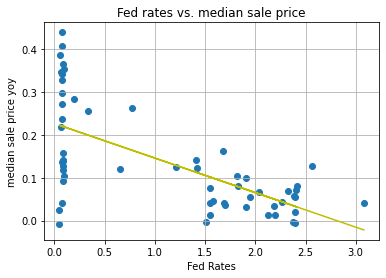

In [27]:
x= mtgprice_1['FED RATES']
y= mtgprice_1['median_sale_price_yoy']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"y-")

plt.xlabel('Fed Rates')
plt.ylabel('median sale price yoy')
plt.title('Fed rates vs. median sale price')
print(f"The r-value is: {rvalue}")
plt.grid()
plt.show()

The r-value is: -0.3793374509678486


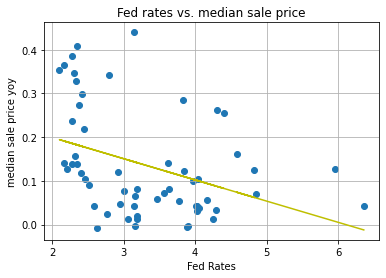

In [37]:
x= mtgprice_1['Mtg15']
y= mtgprice_1['median_sale_price_yoy']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"y-")

plt.xlabel('Fed Rates')
plt.ylabel('median sale price yoy')
plt.title('Fed rates vs. median sale price')
print(f"The r-value is: {rvalue}")
plt.grid()
plt.show()